# Imports

In [1]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=51787b5a79a92f75d57f27b08107062bf25c5747fae09d556e5592d5d3d4df36
  Stored in directory: /root/.cache/pip/wheels/26/af/8b/fac1b47dffef567f945641cdc9b67bb25fae5725d462a8cf81
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=0e262fe92056bbb83ee28ef52ef70b86dd4ff7dda2cfe255dc6385b0ba02f8dd
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ta

  Created wheel for ta: filename=ta-0.7.0-py3-none-any.whl size=28718 sha256=7ba1c391596ae8608bfc492587b5ca7e4ad052900f8203a242825b28e4296949
  Stored in directory: /root/.cache/pip/wheels/5e/74/e0/72395003bd1d3c8f3f5860c2d180ff15699e47a2733d8ebd38
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,LSTM,MaxPooling2D,MaxPooling1D,Conv2D,Conv1D,Dropout,BatchNormalization,TimeDistributed,LeakyReLU,Reshape

# SKLearn
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Yfinance
import yfinance as yf

# Datetime
from datetime import date

# Technical Analysis
import ta
from ta.utils import dropna

# Deep Copy
from copy import deepcopy

# Get the data from Yahoo

In [4]:
def pull_stock_data_from_yahoo(stock_list, start_date : str, end_date : str,period : str):

    """
    
    Summary
    ====================
    This method allows the client to ask yahoo server to provide valid data about a specific stock
    
    Parametres
    ====================
    stock_list - a list of the stock desired by the client ticker strings.
    start_date - the starting date for yahoo's api
    end_date - the end date for yahoo's api - defaults to execution day
    both dates corresponds to the following format : 'yyyy-mm-dd'
    period - supports the following self-explained inputs : 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
    
    return
    ====================
    list of stock name and pd.DataFrame with only "Close" - values as an element
    this can be changed by manipulating the df.drop line
        
    """
    
    list_of_stock_dfs = list()
    
    for stock in stock_list:
    #define the ticker symbol
        tickerSymbol = stock
        
        #get data on this ticker
        tickerData = yf.Ticker(tickerSymbol)
        
        #get the historical prices for this ticker
        df = tickerData.history(period=period, start=start_date, end=end_date)
        df.reset_index(inplace=True)
        list_of_stock_dfs.append([stock,df])
        
    return list_of_stock_dfs

In [5]:
# Stocks List
ticker_list = ['spy','goog','ba','amd','dji','aapl','nvda','wmt']
start_date = '1990-01-01'
end_date = '2021-05-27'
period = '1d'

# Data to split train : test
returned_list = pull_stock_data_from_yahoo(ticker_list,start_date,end_date,period)

# Print
[print(stock[0]+'\n'+str(stock[1].head())+'\n\n') for stock in returned_list]

spy
        Date       Open       High        Low      Close   Volume  Dividends  \
0 1993-01-29  25.902594  25.902594  25.773725  25.884184  1003200        0.0   
1 1993-02-01  25.902589  26.068277  25.902589  26.068277   480500        0.0   
2 1993-02-02  26.049860  26.141909  25.994630  26.123499   201300        0.0   
3 1993-02-03  26.160321  26.418058  26.141912  26.399649   529400        0.0   
4 1993-02-04  26.491701  26.565340  26.197144  26.510111   531500        0.0   

   Stock Splits  
0             0  
1             0  
2             0  
3             0  
4             0  


goog
        Date       Open       High        Low      Close    Volume  Dividends  \
0 2004-08-19  49.813290  51.835709  47.800831  49.982655  44871361          0   
1 2004-08-20  50.316402  54.336334  50.062355  53.952770  22942874          0   
2 2004-08-23  55.168217  56.528118  54.321388  54.495735  18342897          0   
3 2004-08-24  55.412300  55.591629  51.591621  52.239197  15319808          

[None, None, None, None, None, None, None, None]

In [6]:
def determine_annual_interest(list_of_stocks):
    
    """
    
    Summary
    ====================
    Determine for each stock the annual interest
    
    Parametres
    ====================
    list_of_stocks - list of pd.DataFrame of the stocks pulled from yahoo finance api
    
    Output
    ====================
    Annual interest for each stock
        
    """
    interest_list = list()

    for stock in list_of_stocks:

        df = stock[1]
        years_first_df = df.iloc[::240,:] 
        print(str.format('The stock \t{0}\t has \t{1}\t annaul values',stock[0],len(years_first_df)))
        years_first_df.reset_index(inplace=True,drop=True)
        years_first_df.sort_values(by='Date')
        years = len(years_first_df) - 1
        annual_change_list = list()

        for idx in years_first_df.loc[1:,:].index:
            annual_change_list.append(years_first_df.at[idx,'Close']/years_first_df.at[idx-1,'Close'])

        interest_list.append([stock[0],sum(annual_change_list)/years])

    return interest_list

In [7]:
# Print annual interest for selected stocks
interest_list = determine_annual_interest(returned_list)
interest_list

The stock 	spy	 has 	30	 annaul values
The stock 	goog	 has 	18	 annaul values
The stock 	ba	 has 	33	 annaul values
The stock 	amd	 has 	33	 annaul values
The stock 	dji	 has 	33	 annaul values
The stock 	aapl	 has 	33	 annaul values
The stock 	nvda	 has 	24	 annaul values
The stock 	wmt	 has 	33	 annaul values


[['spy', 1.105151919435537],
 ['goog', 1.2839663025599306],
 ['ba', 1.1438512948687474],
 ['amd', 1.4568252032034152],
 ['dji', 1.088404671273036],
 ['aapl', 1.3119806261214004],
 ['nvda', 1.5040072084791691],
 ['wmt', 1.1308994310030283]]

Stock Graph

In [8]:
def plot_stock_graph(list_of_stock_dfs):
    
    """
    
    Summary
    ====================
    uses PyPlot to plot each stock graphs
    
    Parametres
    ====================
    list_of_stock_dfs - list of pd.DataFrame of the stocks pulled from yahoo finance api
        
    """
    for element in list_of_stock_dfs:
        plt.figure(figsize = (8,4))
        plt.plot(range(element[1].shape[0]),(element[1]['Close']))
        plt.xticks(range(0,element[1].shape[0],300),element[1]['Date'].loc[::300],rotation=30)
        plt.xlabel('Date',fontsize=12)
        plt.ylabel('Close Price',fontsize=16)
        plt.title(element[0])
        plt.show()
        print('\n\n')

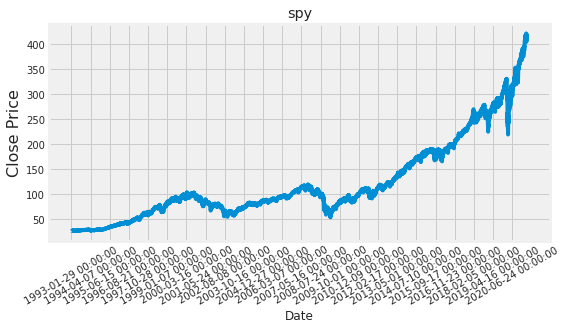

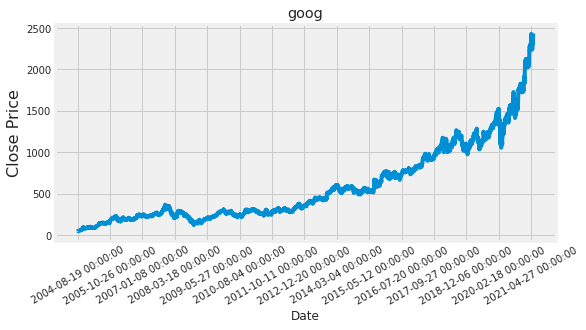

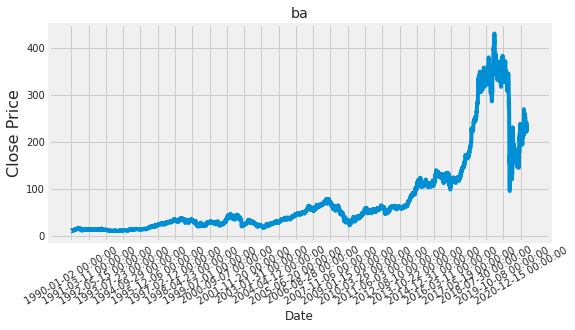

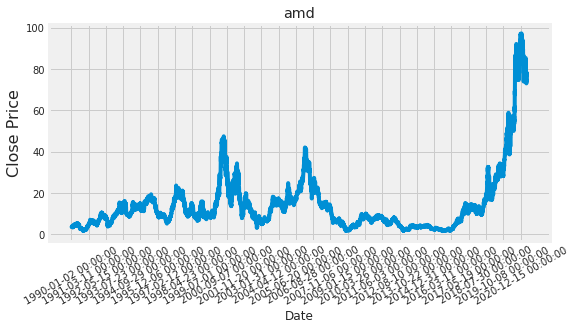

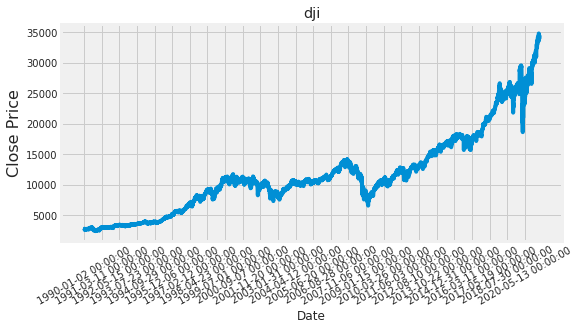

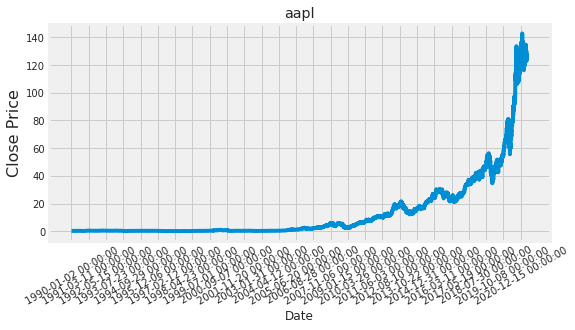

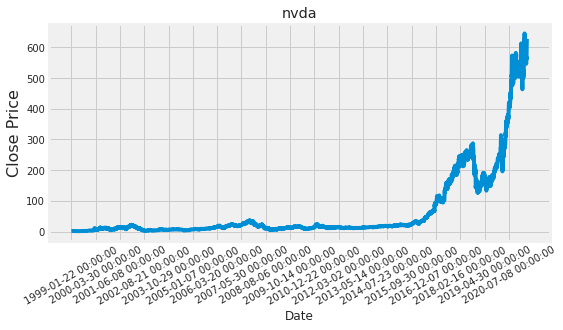

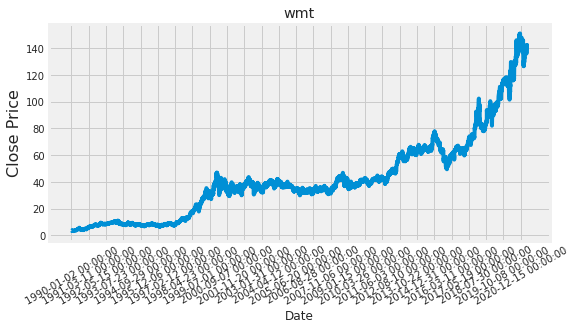

In [9]:
# Plot Stock Graph
plot_stock_graph(returned_list)

# Feature Engineering

In [10]:
# Indicators selection
rsi_bool = False
roc_bool = False
tsi_bool = False
adi_bool = False
fi_bool = False
atr_bool = False
macd_bool = False
vi_bool = False
cr_bool = False
ma_bool = False
ma_dis_bool = False
open_dis_bool = False
high_dis_bool = False
low_dis_bool = False
open_close_ratio_bool = False

In [11]:
def add_features(df_list):
    for element in df_list: # Add indicators
        # Values
        close_val = element[1]["Close"]
        open_val = element[1]["Open"]
        high_val = element[1]["High"]
        low_val = element[1]["Low"]
        volume_val = element[1]["Volume"]
        # RSI
        if rsi_bool:
            element[1]['RSI'] = ta.momentum.RSIIndicator(close = close_val, window=14).rsi()
        # ROC
        if roc_bool:
            element[1]['ROC'] = ta.momentum.ROCIndicator(close = close_val, window=12).roc()
        # TSI
        if tsi_bool:
            element[1]['TSI'] = ta.momentum.TSIIndicator(close = close_val, window_slow=25, window_fast=13).tsi()
        # ADI
        if adi_bool:
            element[1]['ADI'] = ta.volume.AccDistIndexIndicator(close = close_val, high = high_val, low = low_val, volume = volume_val).acc_dist_index()
        # FI
        if fi_bool:
            element[1]['FI'] = ta.volume.ForceIndexIndicator(close = close_val, volume = volume_val).force_index()
        # ATR
        if atr_bool:
            element[1]['ATR'] = ta.volatility.AverageTrueRange(close = close_val, high = high_val, low = low_val, window = 14).average_true_range()
        # MACD
        if macd_bool:
            element[1]['MACD'] = ta.trend.MACD(close = close_val, window_fast  = 9, window_slow = 12, window_sign  = 23).macd()
        # VI
        if vi_bool:
            element[1]['VI_diff'] = ta.trend.VortexIndicator(close = close_val, high = high_val, low = low_val, window = 14).vortex_indicator_diff()
            element[1]['VI_pos'] = ta.trend.VortexIndicator(close = close_val, high = high_val, low = low_val, window = 14).vortex_indicator_pos()
            element[1]['VI_neg'] = ta.trend.VortexIndicator(close = close_val, high = high_val, low = low_val, window = 14).vortex_indicator_neg()
        # CR
        if cr_bool:
            element[1]['CR'] = ta.others.CumulativeReturnIndicator(close = close_val).cumulative_return()
        # MA
        if ma_bool:
            element[1]['MA20'] = ta.volatility.BollingerBands(close = close_val, window = 20).bollinger_mavg()
        # MA_dis
        if ma_dis_bool:
            element[1]['MA20_dis'] =close_val - element[1]['MA20']
        # Open_dis
        if open_dis_bool:
            element[1]['Open_dis'] = close_val - open_val
        # High_dis
        if high_dis_bool:
            element[1]['High_dis'] = high_val - close_val
        # Low_dis
        if low_dis_bool:
            element[1]['Low_dis'] = low_val - close_val
        # Open_Close_Ratio_1d
        if open_close_ratio_bool:
            element[1]['Open_Close_Ratio_1d'] = close_val / open_val
            
        # Remove NaN
        element[1] = element[1].dropna(how='any')
        element[1].reset_index(inplace=True,drop=True)
        
        # Drop Irrelevant Columns
        element[1] = element[1].drop(['Date','Dividends','Stock Splits'],axis=1, errors='ignore')

In [12]:
# Execute feature adding
add_features(returned_list)

# Data for future prediction
future_predict = deepcopy(returned_list)

returned_list[0][1] # Print example

,Open,High,Low,Close,Volume
0,25.902594,25.902594,25.773725,25.884184,1003200
1,25.902589,26.068277,25.902589,26.068277,480500
2,26.049860,26.141909,25.994630,26.123499,201300
3,26.160321,26.418058,26.141912,26.399649,529400
4,26.491701,26.565340,26.197144,26.510111,531500
...,...,...,...,...,...
7128,411.799988,416.630005,411.670013,415.279999,78022200
7129,416.869995,418.200012,414.450012,414.940002,76519100
7130,417.339996,420.320007,417.079987,419.170013,51376700
7131,420.329987,420.709991,417.619995,418.239990,57451400


# Set Predict Value (Change)

In [13]:
def yield_change(list_of_dfs,days):

    """

    Summary
    ====================
    yields the change on stock price between current and 'days' amount forward

    Parametres
    ====================
    list_of_stock_dfs - list of pd.DataFrame of the stocks pulled from yahoo finance api
    days - amount of days to look back

    """

    for element in list_of_dfs:
        (element[1])['Change'] = 0.0
        for idx in (element[1]).index[days:]:
            per_change = element[1].at[idx,'Close']
            element[1].at[idx-days,'Change'] = per_change
        element[1] = element[1][:-days]

In [14]:
# Amount of days to predict ahead
days = 240
yield_change(returned_list,days)
returned_list[0][1]

,Open,High,Low,Close,Volume,Change
0,25.902594,25.902594,25.773725,25.884184,1003200,28.685766
1,25.902589,26.068277,25.902589,26.068277,480500,28.591408
2,26.049860,26.141909,25.994630,26.123499,201300,28.515926
3,26.160321,26.418058,26.141912,26.399649,529400,28.629154
4,26.491701,26.565340,26.197144,26.510111,531500,28.629154
...,...,...,...,...,...,...
6888,315.165809,318.305462,314.585125,318.098785,73641200,415.279999
6889,315.244520,318.177496,314.319354,315.726807,77479200,414.940002
6890,316.346874,317.301566,313.197370,313.965057,95000800,419.170013
6891,306.544082,307.223193,295.274820,295.865326,209243600,418.239990


In [15]:
def past_change(list_of_dfs,past_days_array):

    """

    Summary
    ====================
    yields the change on stock price between current and 'days' amount backwards

    Parametres
    ====================
    list_of_stock_dfs - list of pd.DataFrame of the stocks pulled from yahoo finance api
    days - amount of days to look back

    """
    for element in list_of_dfs:
        for day in past_days_array:
            (element[1])['Past_Change_' + str(day)] = 0.0
            for idx in (element[1]).index[day:]:
                per_change = element[1].at[idx-day,'Close']
                element[1].at[idx,'Past_Change_' + str(day)] = per_change
        element[1] = element[1][max(past_days_array):]

In [16]:
# Amount of days to check change in the past
past_days_array = [120,60,30,15,10,5,3]

# Add features to returned_list
past_change(returned_list,past_days_array)

# Add features to future predict
past_change(future_predict,past_days_array)

# Print
returned_list[0][1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Open,High,Low,Close,Volume,Change,Past_Change_120,Past_Change_60,Past_Change_30,Past_Change_15,Past_Change_10,Past_Change_5,Past_Change_3
120,26.675066,26.712321,26.526043,26.526043,632400,27.389265,25.884184,25.969440,26.561325,26.861341,26.730955,26.749569,26.656422
121,26.581910,26.656422,26.563283,26.656422,286200,27.351051,26.068277,25.913935,26.579815,26.786833,26.805462,26.675060,26.730955
122,26.730951,26.861345,26.730951,26.805462,121300,27.465708,26.123499,26.024937,26.690807,26.637800,26.786833,26.656422,26.712313
123,26.824088,26.842716,26.693694,26.786833,92800,27.456146,26.399649,26.061916,26.653803,26.358370,26.768190,26.730955,26.526043
124,26.730955,26.786839,26.693699,26.730955,30800,27.360613,26.510111,26.228386,26.598322,26.432894,26.861341,26.712313,26.656422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,315.165809,318.305462,314.585125,318.098785,73641200,415.279999,308.966797,242.766418,278.503754,281.761536,290.776947,300.727325,307.252716
6889,315.244520,318.177496,314.319354,315.726807,77479200,414.940002,311.089386,263.519592,282.519348,290.343842,294.359436,303.217377,306.445618
6890,316.346874,317.301566,313.197370,313.965057,95000800,419.170013,311.157562,234.684326,281.220184,287.361664,298.739227,307.252716,314.299652
6891,306.544082,307.223193,295.274820,295.865326,209243600,418.239990,311.177032,247.355408,288.582092,292.243408,298.188080,306.445618,318.098785


# Split Train Test

In [17]:
def split_and_create_batches(list_of_dfs,train_size, days_batch, jump):
    
    """
    
    Summary
    ====================
    splits each and every stock df into batches of desired days_batch.
    that process creates trainable data for the model
    the model will learn for each and every point of time presented on the data what was the price 'days' days in the future.
    
    Parametres
    ====================
    list_of_stock_dfs - list of pd.DataFrame of the stocks pulled from yahoo finance api
    train_size - a number between 0 to 1-validation_size
    validation_size - a number between 0 to 1-train_size
    pay attention! both valus can NOT exceed the value of 1 when 1 means NO TEST PRESENT !
    what ever different train-validation yields the test size
    days_batch - how many days should the model train on. 
    jump - how many days to skip between each iteration. 
    
    Returns
    ====================
    list of stock name and list of data as elemenets.
    list[0] = stock name
    list[1]=
        [
        X_train - train data
        X_test - test data
        y_train - train real values
        y_test - test true values
                                    ]
    
    """
    stock_data_for_model = list()
    
    for element in list_of_dfs:
        df = element[1].copy()

        # --- Minmax Indicators
        # RSI
        if rsi_bool:
            df.loc[:,'RSI'] = df['RSI']/100
        # ROC
        if roc_bool:
            scaler = MinMaxScaler()
            scaler.fit(df['ROC'].values.reshape(-1, 1))
            df.loc[:,'ROC'] = scaler.transform(df['ROC'].values.reshape(-1,1))
        # TSI
        if tsi_bool:
            scaler = MinMaxScaler()
            scaler.fit(df['TSI'].values.reshape(-1, 1))
            df.loc[:,'TSI'] = scaler.transform(df['TSI'].values.reshape(-1,1))
        # ADI
        if adi_bool:
            scaler = MinMaxScaler()
            scaler.fit(df['ADI'].values.reshape(-1, 1))
            df.loc[:,'ADI'] = scaler.transform(df['ADI'].values.reshape(-1,1))
        # FI
        if fi_bool:
            scaler = MinMaxScaler()
            scaler.fit(df['FI'].values.reshape(-1, 1))
            df.loc[:,'FI'] = scaler.transform(df['FI'].values.reshape(-1,1))
        # ATR
        if atr_bool:
            scaler = MinMaxScaler()
            scaler.fit(df['ATR'].values.reshape(-1, 1))
            df.loc[:,'ATR'] = scaler.transform(df['ATR'].values.reshape(-1,1))
        # MACD
        if macd_bool:
            scaler = MinMaxScaler()
            scaler.fit(df['MACD'].values.reshape(-1, 1))
            df.loc[:,'MACD'] = scaler.transform(df['MACD'].values.reshape(-1,1))
        # VI
        if vi_bool:
            scaler = MinMaxScaler()
            scaler.fit(df['VI_diff'].values.reshape(-1, 1))
            df.loc[:,'VI_diff'] = scaler.transform(df['VI_diff'].values.reshape(-1,1))
            scaler = MinMaxScaler()
            scaler.fit(df['VI_pos'].values.reshape(-1, 1))
            df.loc[:,'VI_pos'] = scaler.transform(df['VI_pos'].values.reshape(-1,1))
            scaler = MinMaxScaler()
            scaler.fit(df['VI_neg'].values.reshape(-1, 1))
            df.loc[:,'VI_neg'] = scaler.transform(df['VI_neg'].values.reshape(-1,1))
        # CR
        if cr_bool:
            scaler = MinMaxScaler()
            scaler.fit(df['CR'].values.reshape(-1, 1))
            df['CR'] = scaler.transform(df['CR'].values.reshape(-1,1))
        # MA20
        if ma_bool:
            scaler = MinMaxScaler()
            scaler.fit(df['Close'].values.reshape(-1, 1))
            df.loc[:,'MA20'] = scaler.transform(df['MA20'].values.reshape(-1,1))
        # MA20_dis
        if ma_dis_bool:
            scaler = MinMaxScaler()
            scaler.fit(df['MA20_dis'].values.reshape(-1, 1))
            df.loc[:,'MA20_dis'] = scaler.transform(df['MA20_dis'].values.reshape(-1,1))
        # Open_dis
        if open_dis_bool:
            scaler = MinMaxScaler()
            scaler.fit(df['Open_dis'].values.reshape(-1, 1))
            df.loc[:,'Open_dis'] = scaler.transform(df['Open_dis'].values.reshape(-1,1))
        # High_dis
        if high_dis_bool:
            scaler = MinMaxScaler()
            scaler.fit(df['High_dis'].values.reshape(-1, 1))
            df.loc[:,'High_dis'] = scaler.transform(df['High_dis'].values.reshape(-1,1))
        # Low_dis
        if low_dis_bool:
            scaler = MinMaxScaler()
            scaler.fit(df['Low_dis'].values.reshape(-1, 1))
            df.loc[:,'Low_dis'] = scaler.transform(df['Low_dis'].values.reshape(-1,1))

        # Split Train Test
        split = round(len(df)*train_size) # % Train : Test
        train_data = df[:split]
        test_data = df[split:]

        # Split into batches 
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        train_minmax = []
        test_minmax = []
        
        # Train batches
        for i in range(days_batch, len(train_data), jump):
            # Get data
            # that means that what is left on x_temp is the df WITHOUT THE CHANGE
            x_temp = train_data[i-days_batch:i].drop('Change' , axis=1)
            y_temp = train_data.at[i,'Change']

            # ------------- Train MinMax
            # --------- Close, Open, High, Low
            # Minmax Scaler
            scaler = MinMaxScaler() 
            # Fit Close
            scaler.fit(x_temp['Close'].values.reshape(-1, 1))
            # Save scaler to list
            train_minmax.append(scaler)
            # Transform
            y_temp = scaler.transform(y_temp.reshape(-1, 1)) # Transform y (Close)
            x_temp['Close'] = scaler.transform(x_temp['Close'].values.reshape(-1,1)) # Transform X Close
            x_temp['High'] = scaler.transform(x_temp['High'].values.reshape(-1,1)) # Transform X High
            x_temp['Low'] = scaler.transform(x_temp['Low'].values.reshape(-1,1)) # Transform X Low
            x_temp['Open'] = scaler.transform(x_temp['Open'].values.reshape(-1,1)) # Transform X Open

            for day in past_days_array:
                x_temp['Past_Change_'+str(day)] = scaler.transform(x_temp['Past_Change_'+str(day)].values.reshape(-1,1))

            # --------- Volume
            scaler = MinMaxScaler()
            scaler.fit(x_temp['Volume'].values.reshape(-1, 1))
            x_temp['Volume'] = scaler.transform(x_temp['Volume'].values.reshape(-1,1))

            # Append to X_train / y_train
            X_train.append(x_temp)
            y_train.append(y_temp)
        
        # Test batches
        for i in range(days_batch, len(test_data), jump):
            # Get data
            x_temp = test_data[i-days_batch:i].drop('Change', axis=1)
            y_temp = test_data.at[i+split,'Change']

            # ------------- Test MinMax
            # --------- Close, Open, High, Low
            # Minmax Scaler
            scaler = MinMaxScaler() 
            # Fit Close
            scaler.fit(x_temp['Close'].values.reshape(-1, 1))
            # Save scaler to list
            test_minmax.append(scaler)
            # Transform
            y_temp = scaler.transform(y_temp.reshape(-1, 1)) # Transform y (Close)
            x_temp['Close'] = scaler.transform(x_temp['Close'].values.reshape(-1,1)) # Transform X Close
            x_temp['High'] = scaler.transform(x_temp['High'].values.reshape(-1,1)) # Transform X High
            x_temp['Low'] = scaler.transform(x_temp['Low'].values.reshape(-1,1)) # Transform X Low
            x_temp['Open'] = scaler.transform(x_temp['Open'].values.reshape(-1,1)) # Transform X Open

            for day in past_days_array:
                x_temp['Past_Change_'+str(day)] = scaler.transform(x_temp['Past_Change_'+str(day)].values.reshape(-1,1))

            # --------- Volume
            scaler = MinMaxScaler()
            scaler.fit(x_temp['Volume'].values.reshape(-1, 1))
            x_temp['Volume'] = scaler.transform(x_temp['Volume'].values.reshape(-1,1))

            # Append to X_test / y_test
            X_test.append(x_temp)
            y_test.append(y_temp)
        
        # Convert to numpy array
        
        X_train = np.asarray(X_train)
        y_train = np.asarray(y_train)
        X_test = np.asarray(X_test)
        y_test = np.asarray(y_test)

        # Reshape
        y_train = y_train.reshape(y_train.shape[0],1)
        y_test = y_test.reshape(y_test.shape[0],1)

        # Print shapes
        print(element[0])
        print('X_train shape: ', X_train.shape)
        print('y_train shape: ', y_train.shape)
        print('X_test shape: ', X_test.shape)
        print('y_test shape: ', y_test.shape)
    
        stock_data_for_model.append([element[0],[X_train,X_test,y_train,y_test,train_minmax,test_minmax]])
    
    return stock_data_for_model

In [18]:
def prediction_batches(list_of_dfs, days_batch):
    
    future_prediction_data_for_model = list()
    
    for element in list_of_dfs:
        df = element[1].copy()

        # Keep only last days for prediction (days_batch)
        X_prediction_data = df[-days_batch:].copy()
        

        # ------------- MinMax
        # --------- Close, Open, High, Low
        # Minmax Scaler
        scaler = MinMaxScaler() 
        # Fit Close
        scaler.fit(X_prediction_data['Close'].values.reshape(-1, 1))
        # Transform
        X_prediction_data['Close'] = scaler.transform(X_prediction_data['Close'].values.reshape(-1,1)) # Transform X Close
        X_prediction_data['High'] = scaler.transform(X_prediction_data['High'].values.reshape(-1,1)) # Transform X High
        X_prediction_data['Low'] = scaler.transform(X_prediction_data['Low'].values.reshape(-1,1)) # Transform X Low
        X_prediction_data['Open'] = scaler.transform(X_prediction_data['Open'].values.reshape(-1,1)) # Transform X Open
        
        for day in past_days_array:
            X_prediction_data['Past_Change_'+str(day)] = scaler.transform(X_prediction_data['Past_Change_'+str(day)].values.reshape(-1,1))
        # --------- Volume
        scaler = MinMaxScaler()
        scaler.fit(X_prediction_data['Volume'].values.reshape(-1, 1))
        X_prediction_data['Volume'] = scaler.transform(X_prediction_data['Volume'].values.reshape(-1,1))
        
        # Convert to numpy array
        X_prediction_data = np.asarray(X_prediction_data)

        # Print shapes
        print(element[0])
        print('X_prediction_data shape: ', X_prediction_data.shape)
    
        future_prediction_data_for_model.append([element[0],[X_prediction_data]])
    
    return future_prediction_data_for_model

In [19]:
days_batch=550
data_to_model = split_and_create_batches(returned_list,0.7, days_batch, 1)
future_predict_dataset = prediction_batches(future_predict, days_batch)

spy
X_train shape:  (4191, 550, 12)
y_train shape:  (4191, 1)
X_test shape:  (1482, 550, 12)
y_test shape:  (1482, 1)
goog
X_train shape:  (2153, 550, 12)
y_train shape:  (2153, 1)
X_test shape:  (609, 550, 12)
y_test shape:  (609, 1)
ba
X_train shape:  (4736, 550, 12)
y_train shape:  (4736, 1)
X_test shape:  (1716, 550, 12)
y_test shape:  (1716, 1)
amd
X_train shape:  (4736, 550, 12)
y_train shape:  (4736, 1)
X_test shape:  (1716, 550, 12)
y_test shape:  (1716, 1)
dji
X_train shape:  (4624, 550, 12)
y_train shape:  (4624, 1)
X_test shape:  (1668, 550, 12)
y_test shape:  (1668, 1)
aapl
X_train shape:  (4736, 550, 12)
y_train shape:  (4736, 1)
X_test shape:  (1716, 550, 12)
y_test shape:  (1716, 1)
nvda
X_train shape:  (3134, 550, 12)
y_train shape:  (3134, 1)
X_test shape:  (1029, 550, 12)
y_test shape:  (1029, 1)
wmt
X_train shape:  (4736, 550, 12)
y_train shape:  (4736, 1)
X_test shape:  (1716, 550, 12)
y_test shape:  (1716, 1)
spy
X_prediction_data shape:  (550, 12)
goog
X_predictio

In [20]:
# Amount of features
feature_num = data_to_model[0][1][0][0][1].shape[0]
print(feature_num,' Features')

12  Features


# Define model & Learn

In [21]:
def train_each_stock_model(model_list,T,features_num, model_epochs, model_batch_size):
    
    """
    
    Summary
    ====================
    train each and every stock
    
    Parametres
    ====================
    model_list - a list containing the stock name and data list
    T - batch_size
    features_num - length of input feature vector
    model_epochs - amount of epochs for the model
    model_batch_size - weights update skip amount
    
    return
    ====================
    train model for each and every stock
        
    """
    # Build Conv model
    model = Sequential()
    model.add(Conv2D(64,kernel_size=[3,1], activation='relu',padding='same',input_shape=[T,features_num,1]))
    model.add(Conv2D(64,kernel_size=[1,features_num], activation='relu',padding='same'))
    model.add(MaxPooling2D((2,1)))
    model.add(Reshape(((int(T/2)*features_num),64)))
    model.add(LSTM(units=64))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Dense(1))
    
    # Summary
    model.summary()
    trained_models = list()
    
    # Compile model
    for element in model_list:
        model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_squared_error')
        X_train = element[1][0]
        y_train = element[1][2]
        X_validation = element[1][1]
        y_validation = element[1][3]
            
        # Fit Model
        history = model.fit(X_train.reshape(list(X_train.shape) + [1]), y_train, epochs = model_epochs, batch_size = model_batch_size , validation_data=(X_validation.reshape(list(X_validation.shape) + [1]),y_validation), shuffle=False)
        
        # Save Model
        trained_models.append([element[0],model, history])
    
    return trained_models

In [22]:
# Set epochs & Batch_size
epochs = 15
batch_size = 32

# Train Models
models = train_each_stock_model(data_to_model,days_batch,feature_num,epochs,batch_size)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 550, 12, 64)       256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 550, 12, 64)       49216     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 275, 12, 64)       0         
_________________________________________________________________
reshape (Reshape)            (None, 3300, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                6

# Model Evaluation

Helper Functions

In [23]:
def create_stock_prediction(stocks_trained_models_list,model_data_list):
    """
    
    Summary
    ====================
    uses every stock model to predict on the validation set
    transform the prediction results to binary presentation

    Parametres
    ====================
    stocks_trained_models_list - the already trained models
    model_data_list - the list containning the data with the y_validation real values
    
    return
    ====================
    a list containing stock name, the predicted binary as well as the real binary values
    
        
    """
    stock_prediction = list()
    
    for (trained,data) in zip(stocks_trained_models_list,model_data_list):
        model = trained[1]
        X_test = data[1][1].copy()
        y_validation = data[1][3].copy()
        y_predicted = model.predict(X_test.reshape(list(X_test.shape) + [1]))
        y_change = []
        y_pred_change = []

        # Change of the following days
        for idx in range(len(y_validation)):
            if idx-days >= 0:
                y_change.append(1 if (y_validation[idx] - y_validation[idx-days])>= 0 else 0)
                y_pred_change.append(1 if (y_predicted[idx] - y_validation[idx-days])>= 0 else 0)

        stock_prediction.append([trained[0],y_change,y_pred_change])
    
    return stock_prediction

In [24]:
def print_classification(prediction_list):
    
    """
    Summary
    ====================
    print classification report for all the stocks given
    
    Parametres
    ====================
    prediction_list - a list containning all prediction as well as real validation values
    
    """
    for prediction in prediction_list:
        print(str.format('{0}\n{1}\n',prediction[0],classification_report(prediction[1],prediction[2])))

In [25]:
def print_model_MSE(model_list):
    
    """
    Summary
    ====================
    print the MSE loss as learnning perceeds
    
    Parametres
    ====================
    model_list - the list containning the model history
    
    """
    
    for stock_model in model_list:
        plt.plot(stock_model[2].history['mean_squared_error'], label='MSE (training data)')
        plt.plot(stock_model[2].history['val_mean_squared_error'], label='MSE (validation data)')
        plt.title(stock_model[0] + ' - MSE')
        plt.ylabel('MSE value')
        plt.xlabel('No. epoch')
        plt.legend(loc="upper left")
        plt.show()
        print('\n\n')

In [26]:
def conclude_stocks(model_list,prediction_list):
      
    """
    Summary
    ====================
    creates a data frame with the evaluation conclusion.
    it includes the name of the stock, the train loss, the validation loss and the accuracy score
      
    Parametres
    ====================
    model_list - the list containning the model history
    prediction_list - a list containning all prediction as well as real validation values
      
    """
    mean_squared_error = list()
    val_mean_squared_error = list()
    for model in model_list:
        mean_squared_error.append(min(model[2].history['mean_squared_error']))
        val_mean_squared_error.append(min(model[2].history['val_mean_squared_error']))  
    
    data = list()
    for idx in range(len(model_list)):
        data.append([model_list[idx][0],
                 mean_squared_error[idx],
                 val_mean_squared_error[idx],
                 accuracy_score(prediction_list[idx][1],prediction_list[idx][2])])

    final_result_df = pd.DataFrame(columns = ['Stock','Train_Loss','Test_Loss','Accuracy_Score'], 
                                  data = data)
  
    return final_result_df

In [27]:
def print_graphs(models, data_to_model,offset):
    """
    
    Summary
    ====================
    uses the model and scaler information to display unscaled stocks graphs (real vs predicted)

    Parametres
    ====================
    models - the already trained models
    data_to_model - the list containning the data with the y_validation real values, X values, and minmax values
    
    Output
    ====================
    Print to screen stocks graphs
    
        
    """
    
    # Get prediction values
    for idx in range(len(models)):
        # Company Name
        print(models[idx][0])
    
        # Predict
        X_test = data_to_model[idx][1][1].copy()
        y_test = data_to_model[idx][1][3].copy()
        y_test_predicted = models[idx][1].predict(X_test.reshape(list(X_test.shape) + [1]))
    
        # MinMax Scalers (For unscaling)
        test_minmax = data_to_model[idx][1][5].copy()
    
        # Unscale
        y_test_unscaled = y_test.copy()
        y_test_predicted_unscaled = y_test_predicted.copy()
    
        # Unscaling
        for idx in range(len(test_minmax)):
            scaler = test_minmax[idx]
            y_test_unscaled[idx] = scaler.inverse_transform(y_test[idx].reshape(-1, 1))
            y_test_predicted_unscaled[idx] = scaler.inverse_transform(y_test_predicted[idx].reshape(-1, 1))
    
        # Plot Real vs Predicted y Graph
        plt.figure(figsize = (10,5))
        if offset:
            plt.plot(y_test_unscaled,'r')
            plt.plot(y_test_predicted_unscaled[int(days/2):],'g')
        else:
            plt.plot(y_test_unscaled,'r')
            plt.plot(y_test_predicted_unscaled,'b')
        
        plt.xlabel('Date',fontsize=14)
        plt.ylabel('Real vs Predicted',fontsize=18)
        plt.show()

In [28]:
def autolabel(ax,rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=14,color='black')

In [29]:
def plot_conclusions(pred_list,interest_list, future_interests_list):
    
    """
    
    Summary
    ====================
    Displays bar chart with interest and accuracy information

    Parametres
    ====================
    pred_list - List of predictions
    interest_list - List of interests
    
    Output
    ====================
    Print to screen stocks/models bar chart of accuracy & interests
    
        
    """
    
    names = y_axes_interest=[interest[0] for interest in interest_list]
    stocks_count = len(names)
    x_axes = np.arange(stocks_count)
    y_axes_accuracy =[accuracy_score(pred_list[idx][1],pred_list[idx][2]) for idx in range(len(pred_list)) ]
    y_axes_interest=[interest[1] for interest in interest_list]
    y_axes_accuracy = [int(val*100) for val in y_axes_accuracy]
    y_axes_interest = [int(val*100) for val in y_axes_interest]
    y_axes_future_interest = [interest[1][0][0] for interest in future_interests_list]
    x_width = 0.25

    # Plot Configurations
    fig = plt.figure()
    ax = fig.add_axes([0,0,2.5,2.5])
    ax.set_ylabel('Precentage',Fontsize=18)
    ax.set_title( r"$\bf{" + 'Research\ Conclusion' + "}$",size=28)
    rect_accuracy = ax.bar(x_axes , y_axes_accuracy, color = 'b', width =x_width)
    rect_interest = ax.bar(x_axes + 0.25 , y_axes_interest, color = 'g', width = x_width)
    rect_future_interest = ax.bar(x_axes + 0.50 , y_axes_future_interest, color = 'r', width = x_width)
    ax.set_xticks(np.add(x_axes,(x_width)))
    ax.set_xticklabels(names,Fontsize=16)
    ax.legend(labels=['Accuracy','Annually Interest','Future Interest'],fontsize=18)
    autolabel(ax,rect_accuracy)
    autolabel(ax,rect_interest)
    autolabel(ax,rect_future_interest)

    plt.show()

In [30]:
def predict_future_interest(model_list,data_to_model):
    """
    
    Summary
    ====================
    uses the model to predict future stocks interests

    Parametres
    ====================
    models - the already trained models
    data_to_model - the list containning the data with recent X values
    
    Output
    ====================
    List containing stocks interests
    
        
    """
    future_interests = []
    
    # Get prediction values
    for idx in range(len(models)):
        # Company Name
        c_name = models[idx][0]
    
        # Predict
        X_future_data = data_to_model[idx][1][0].copy()
        y_future_predicted = models[idx][1].predict(X_future_data.reshape([1] + list(X_future_data.shape) + [1]))
        
        # Compute interest
        interest = y_future_predicted * 100 / data_to_model[idx][1][0][-1][3]
        
        # Append to list
        future_interests.append([c_name, interest])
    
    # Return
    return future_interests

In [31]:
def print_future_interest(interests_list):
    """
    
    Summary
    ====================
    Print to screen stock interests

    Parametres
    ====================
    interests_list - List of all stocks interests
    
        
    """
    for stock in interests_list:
        print('Stock:\t',stock[0],'\t Interest:\t',stock[1][0][0])

Predict Future interest

In [32]:
# Use model to predict future interest
future_interests = predict_future_interest(models,future_predict_dataset)

# Print future interest for each stock
print_future_interest(future_interests)

Stock:	 spy 	 Interest:	 109.69186
Stock:	 goog 	 Interest:	 109.57129
Stock:	 ba 	 Interest:	 113.39281
Stock:	 amd 	 Interest:	 100.69851
Stock:	 dji 	 Interest:	 113.10261
Stock:	 aapl 	 Interest:	 109.55076
Stock:	 nvda 	 Interest:	 99.95611
Stock:	 wmt 	 Interest:	 110.010345


Evaluation Outputs

In [33]:
# Create binary prediction values for classification report
pred_list = create_stock_prediction(models,data_to_model)

# Print classification matrix
print_classification(pred_list)

spy
              precision    recall  f1-score   support

           0       0.74      0.89      0.80       706
           1       0.80      0.58      0.67       536

    accuracy                           0.75      1242
   macro avg       0.77      0.73      0.74      1242
weighted avg       0.76      0.75      0.75      1242


goog
              precision    recall  f1-score   support

           0       0.43      0.75      0.54       109
           1       0.85      0.58      0.69       260

    accuracy                           0.63       369
   macro avg       0.64      0.66      0.62       369
weighted avg       0.72      0.63      0.64       369


ba
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       981
           1       0.81      0.62      0.70       495

    accuracy                           0.82      1476
   macro avg       0.82      0.77      0.79      1476
weighted avg       0.82      0.82      0.82      1476


amd


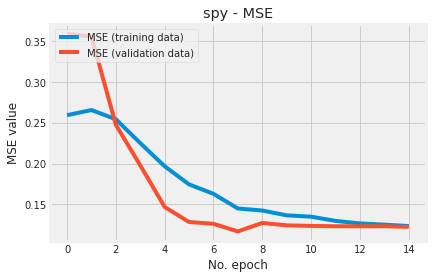

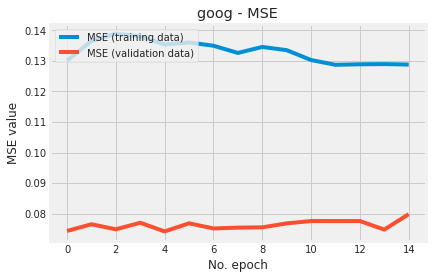

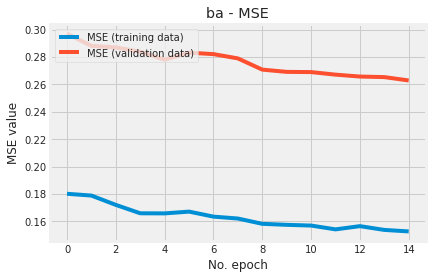

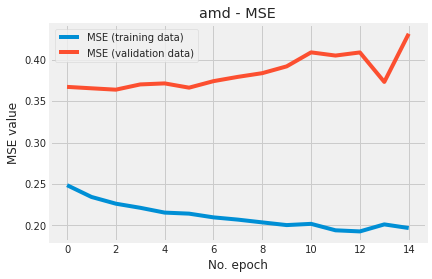

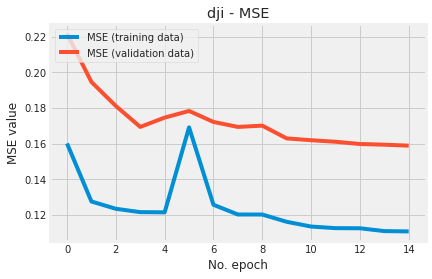

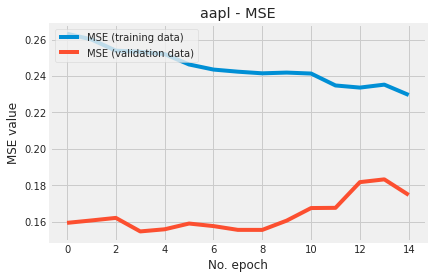

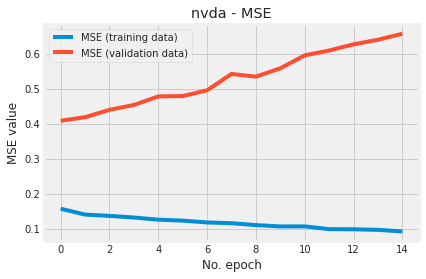

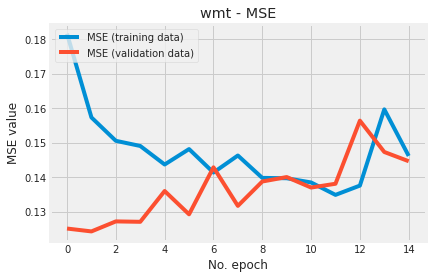

In [34]:
# Print model MSE
print_model_MSE(models)

spy


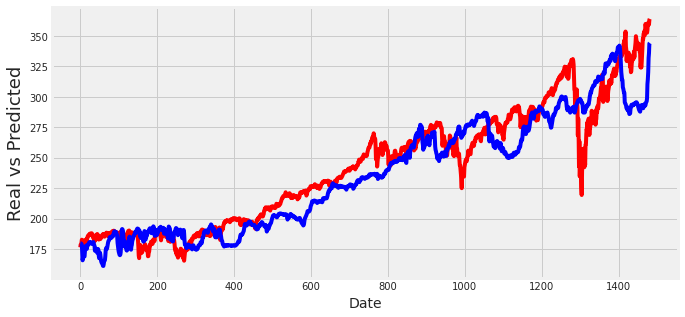

goog


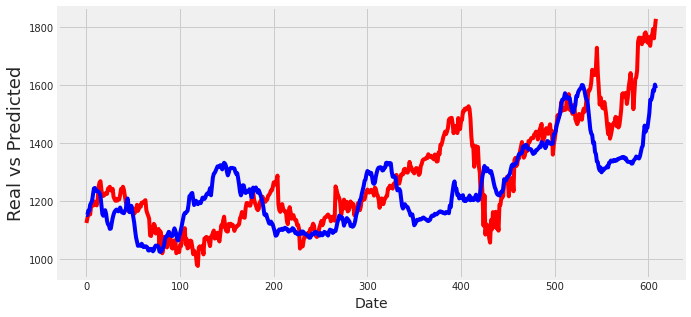

ba


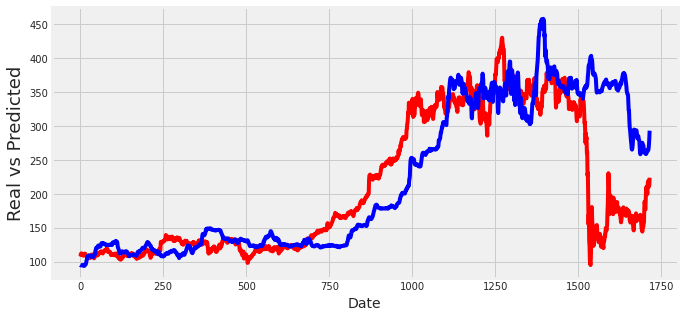

amd


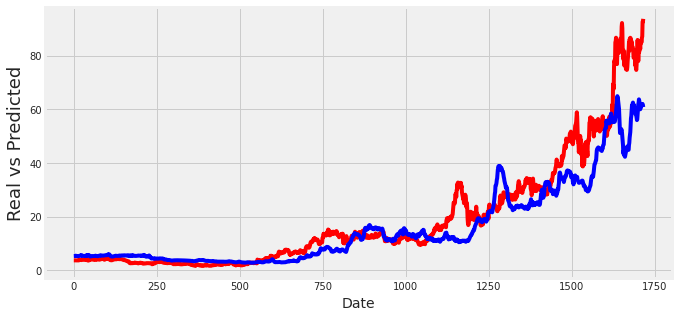

dji


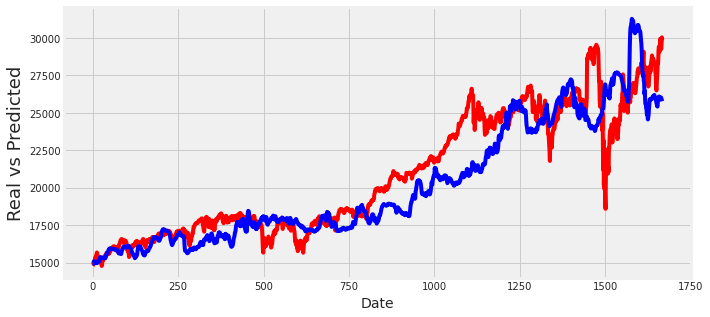

aapl


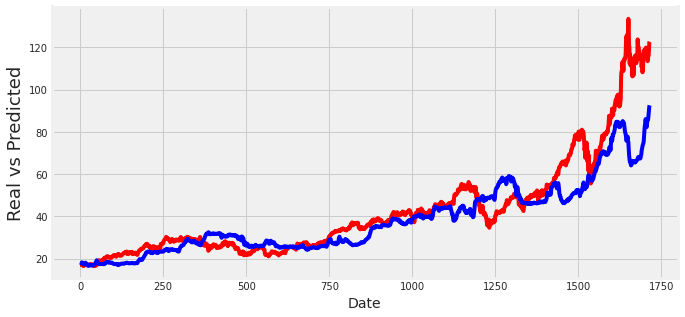

nvda


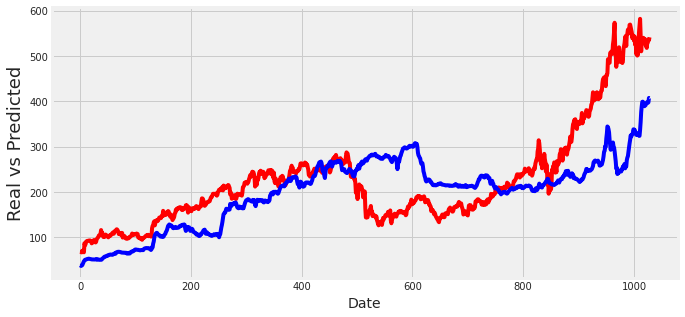

wmt


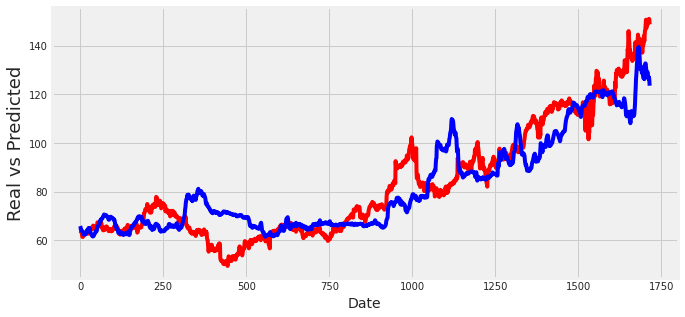

In [35]:
# Print Stock Graphs (No offset)
print_graphs(models, data_to_model,False)

spy


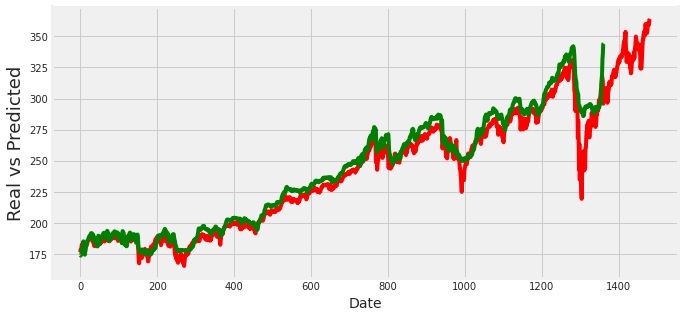

goog


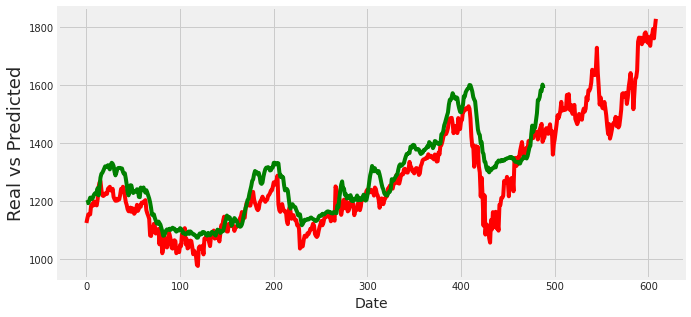

ba


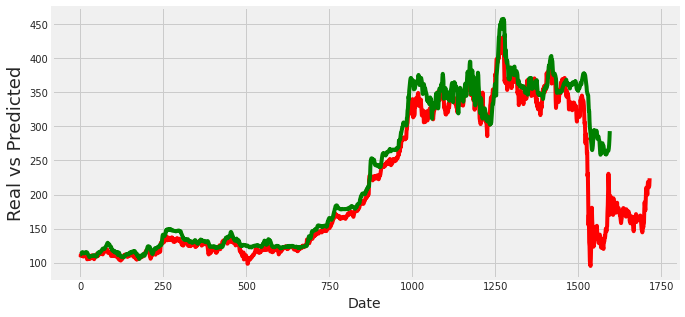

amd


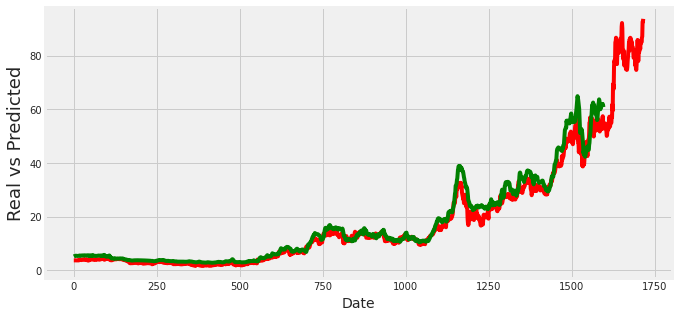

dji


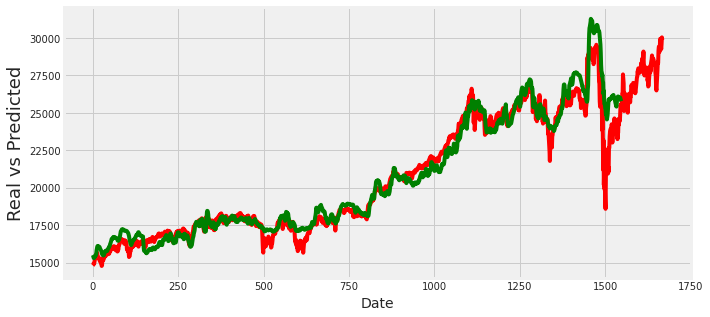

aapl


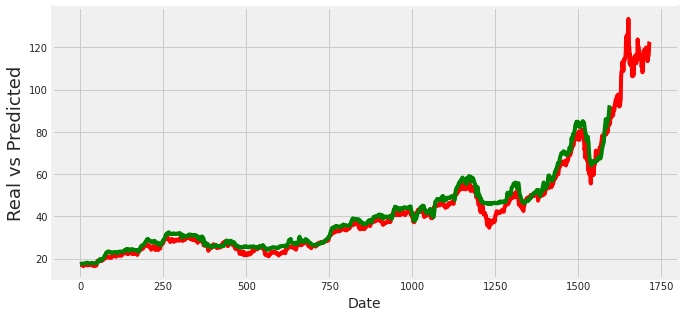

nvda


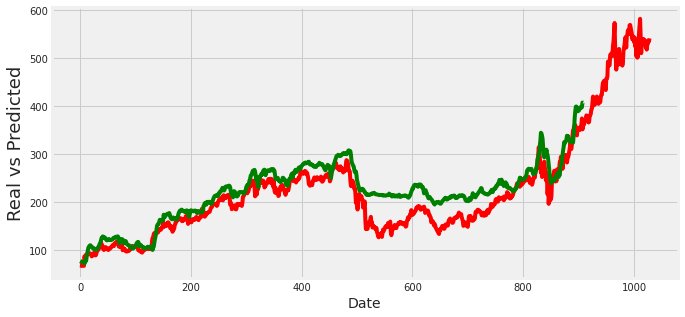

wmt


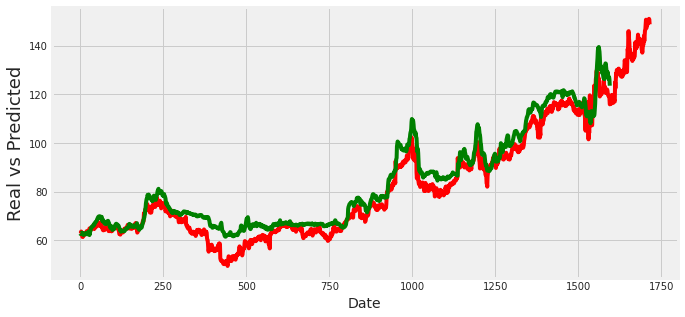

In [36]:
# Print Stock Graphs (No offset)
print_graphs(models, data_to_model,True)

In [37]:
# Print Conclusions
conclusion_df = conclude_stocks(models,pred_list)
print(conclusion_df)

  Stock  Train_Loss  Test_Loss  Accuracy_Score
0   spy    0.123471   0.116918        0.754428
1  goog    0.128722   0.074199        0.628726
2    ba    0.152676   0.262899        0.822493
3   amd    0.192853   0.363772        0.671409
4   dji    0.110685   0.158884        0.723389
5  aapl    0.229565   0.154668        0.847561
6  nvda    0.092288   0.409000        0.977186
7   wmt    0.134877   0.124283        0.795393


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


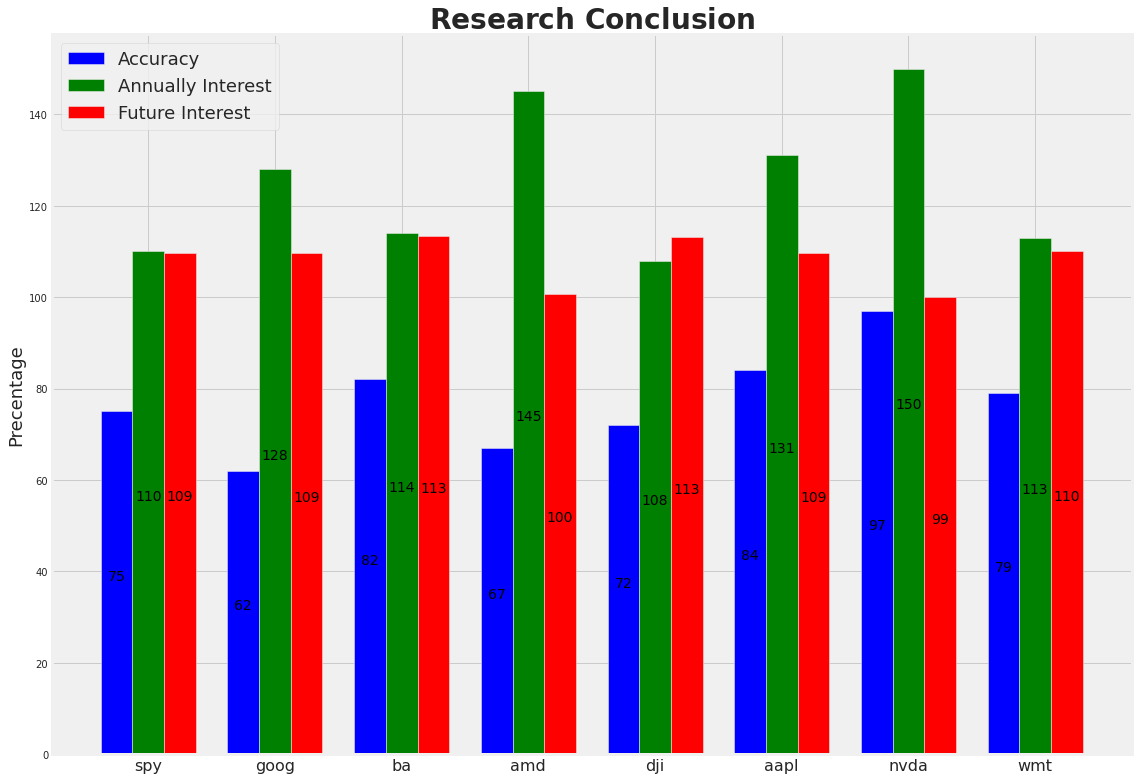

In [38]:
# Plot Conclusions
plot_conclusions(pred_list,interest_list, future_interests)